In [473]:
import pandas as pd
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course2-Data Science With Python/Datasets/California_housing.xlsx")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [474]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

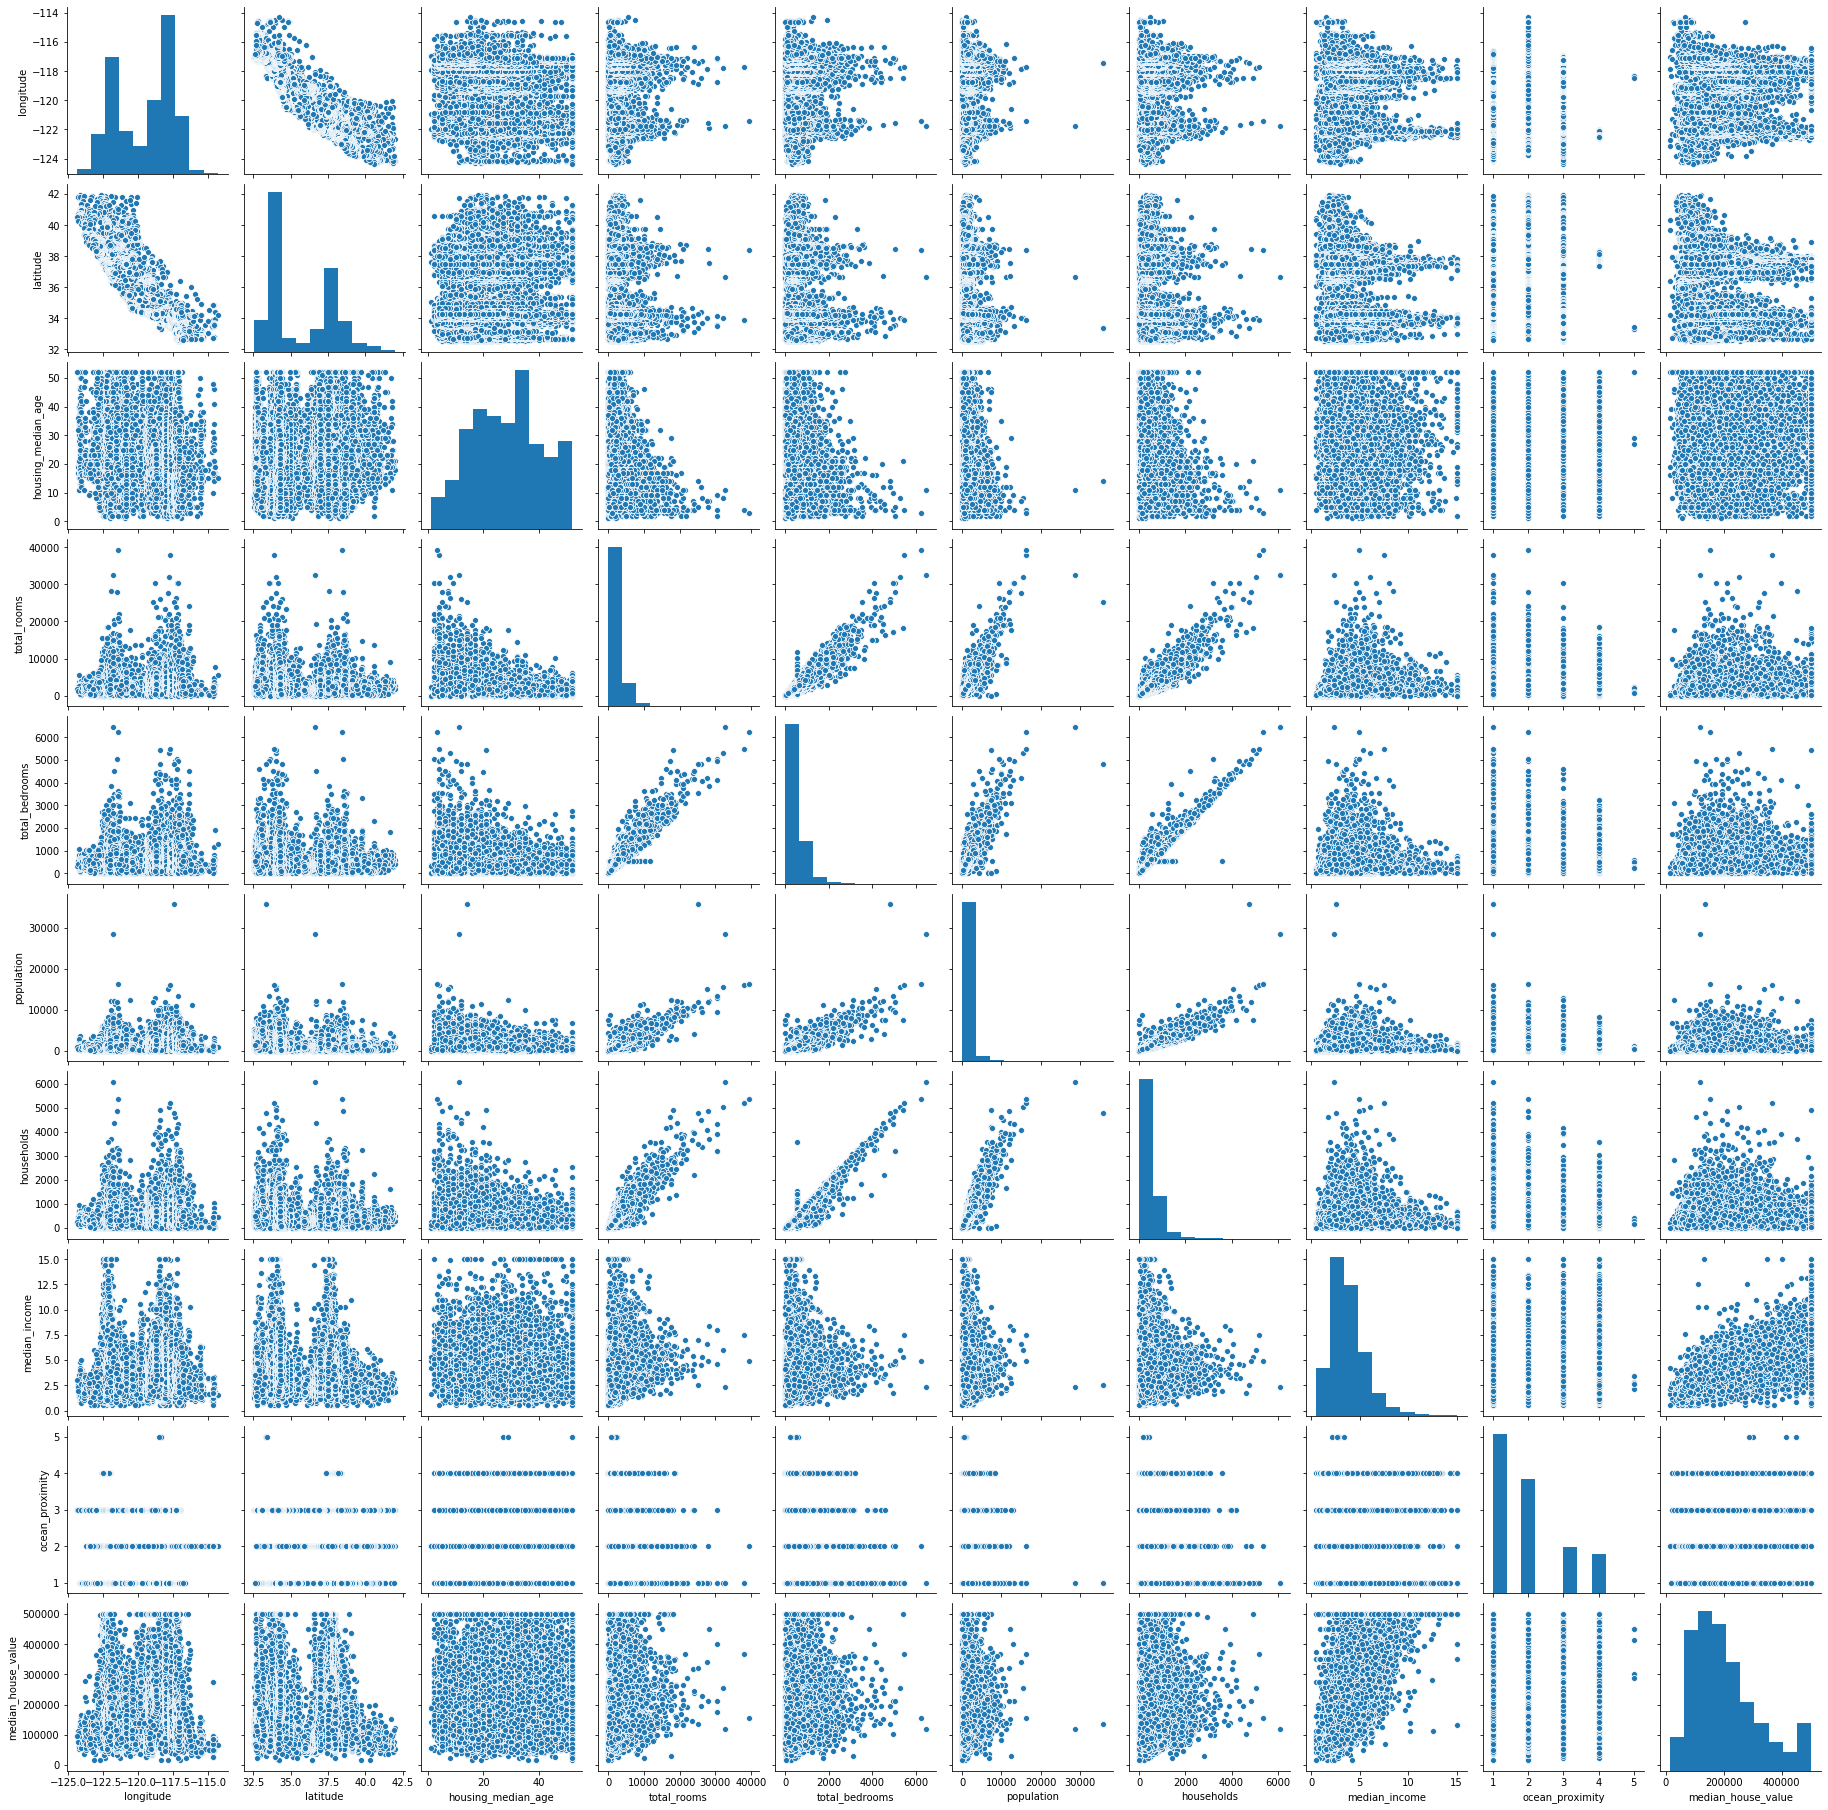

In [562]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)
# The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots 
# on the upper and lower triangles show the relationship (or lack thereof) between two variables


KeyboardInterrupt: 

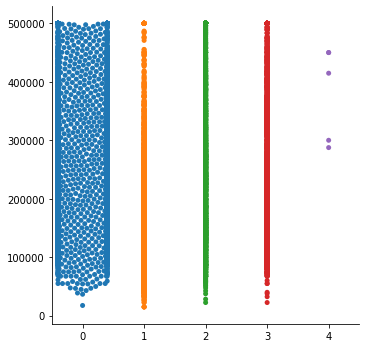

In [567]:
sns.catplot(x='ocean_proximity', y='median_house_value', kind='swarm',data=data)

In [ ]:
from sklearn import preprocessing
import numpy as np

# function that returns the scaled dataframe
def scale_df(df):

    # Get column names first
    names = df.columns

    # Create the Scaler object
    scaler = preprocessing.StandardScaler()

    # Fit your data on the scaler object
    scaled_df = scaler.fit_transform(df)

    return pd.DataFrame(scaled_df, columns=names)

# suppose you have two df's that need to be scalled
df_1 = pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course2-Data Science With Python/Datasets/California_housing.xlsx")
df_2 = pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course2-Data Science With Python/Datasets/California_housing.xlsx")

var_list = ['a', 'b', 'c', 'd', 'd', 'e', 'f', 'g', 'h', 'i']
results = []

# loop dataframes
for df in [df_1, df_2]:
    scaled_df = scale_df(df)
    
    # loop variables
    y_var = 'lp'
    for x_var in var_list:
        formula = y_var + ' ~ ' + x_var
        results.append(smf.ols(formula, data=scaled_df).fit())

In [572]:
# import necessary modules
from sklearn.datasets import load_iris
from sklearn import preprocessing

# access iris data set from sklearn datasets
#iris = load_iris()
datash = pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course2-Data Science With Python/Datasets/California_housing.xlsx")
# separate data to X and y for features and targets
X = datash.data
y = datash.target
print(X)
print(y)
# print out standardized version of features dataset X
print(preprocessing.scale(X))

AttributeError: 'DataFrame' object has no attribute 'data'

In [549]:
# Task1:- Build a model of housing prices to predict median house values in California using the provided dataset.
# splitting x and y variables
#x=data.drop('median_house_value',1)
#y=data['median_house_value']

x=data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']]
x.shape
y=data[['median_house_value']]
y.shape

(20640, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017793316488>,
      dtype=object)

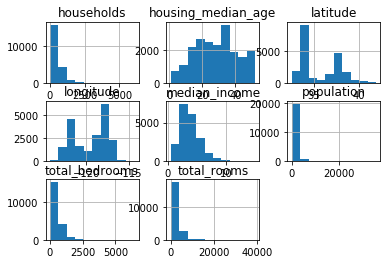

In [522]:
x.hist()

In [477]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [478]:
data['total_bedrooms'].mean()

537.8705525375618

In [479]:
# Fill the missing values with the mean of the respective column.
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data.loc[341,]

longitude              -122.17
latitude                 37.75
housing_median_age          38
total_rooms                992
total_bedrooms         537.871
population                 732
households                 259
median_income           1.6196
ocean_proximity       NEAR BAY
median_house_value       85100
Name: 341, dtype: object

In [480]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [481]:
# Convert categorical column in the dataset to numerical data.
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [482]:
new_Ocean_proximity = {"ocean_proximity": {"<1H OCEAN":1 ,"INLAND":2, "NEAR OCEAN":3, "NEAR BAY":4, "ISLAND":5}}
data.replace(new_Ocean_proximity, inplace=True)
data.shape

(20640, 10)

In [483]:
data1=data
data1.shape

(20640, 10)

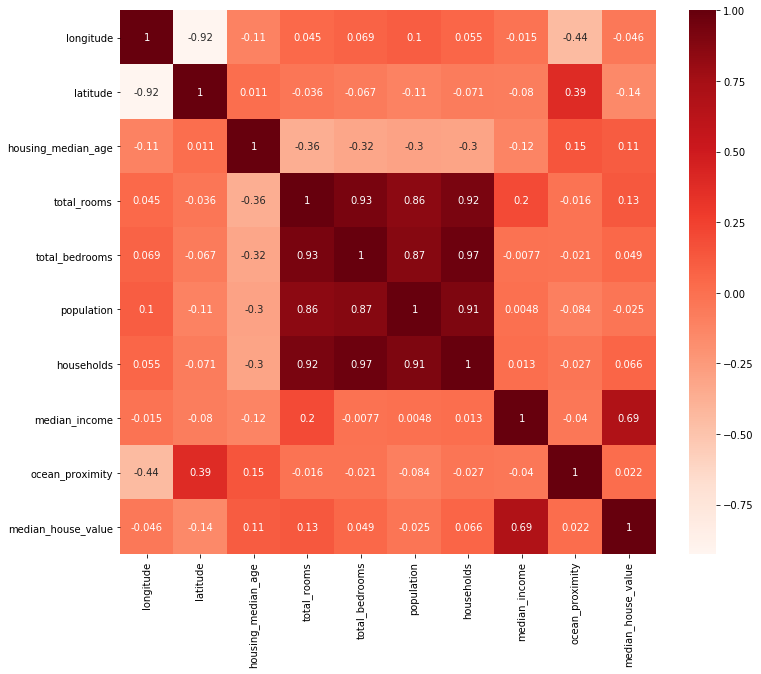

In [484]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
data1=data1.corr()
sns.heatmap(data1, annot=True, cmap=plt.cm.Reds)
plt.show()
# We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.
# The correlation coefficient has values between -1 to 1
# — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
# — A value closer to 1 implies stronger positive correlation
# — A value closer to -1 implies stronger negative correlation

In [485]:
data1['total_rooms'].corr(data1['total_bedrooms'])

0.9874776633408495

In [486]:
#Correlation with output variable
cor_target = abs(data1["median_house_value"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
#As we can see, only the features median_income is highly correlated with the output variable median_house_value. 

median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [487]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data1.values,i) for i in range(data1.shape[1])]
vif["features"] = data1.columns
vif.round(1)
# As expected,longitude & latitude have a high variance inflation factor because they "explain" the same variance within 
# this dataset.I will discard one of these variables before moving on to model building or risk building a model with high multicolinearity. 
# I am discarding longitude as latitude has high correlation with median_house_value as compare to longitude.
# Also, total_rooms & total_bedrooms have a high variance inflation factor. Instead of discarding I will combine them both 
# and create new variable as rooms = total_rooms + total_bedrooms.
# Similarly, population & households have a high variance inflation factor. I will discard population and will keep households
# as households as better correlation with the output variable median_house_value.

,VIF Factor,features
0,481.1,longitude
1,469.2,latitude
2,4.2,housing_median_age
3,895.8,total_rooms
4,4824.5,total_bedrooms
5,368.2,population
6,4998.5,households
7,41.9,median_income
8,3.4,ocean_proximity
9,34.1,median_house_value


In [488]:
data.shape
new_x = data[['latitude','housing_median_age', 'households', 'median_income','ocean_proximity']]
new_x['rooms'] = data['total_rooms'] + data['total_bedrooms']
new_x

C:\Users\sharv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,latitude,housing_median_age,households,median_income,ocean_proximity,rooms
0,37.88,41,126,8.3252,4,1009.0
1,37.86,21,1138,8.3014,4,8205.0
2,37.85,52,177,7.2574,4,1657.0
3,37.85,52,219,5.6431,4,1509.0
4,37.85,52,259,3.8462,4,1907.0
...,...,...,...,...,...,...
20635,39.48,25,330,1.5603,2,2039.0
20636,39.49,18,114,2.5568,2,847.0
20637,39.43,17,433,1.7000,2,2739.0
20638,39.43,18,349,1.8672,2,2269.0


In [543]:
# cross validation
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
#scores = cross_val_score(Modelsh, new_x, y, cv=10)
#print ('Cross-validated scores:', scores)

#Make cross validated predictions
#predictions = cross_val_predict(Modelsh, new_x, y, cv=10)
#plt.scatter(y, predictions)
#accuracy = metrics.r2_score(y, predictions)
#print ('Cross-Predicted Accuracy:', accuracy)
#Modelsh is built after test and train split
#--------------------------------------------
#Now let’s use k-folds cross-validation to assess the performance of our model again.
model = LinearRegression()
scores = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(new_x, y)):
 model.fit(new_x.iloc[train,:], y.iloc[train,:])
 scores.append(model.score(new_x.iloc[test,:], y.iloc[test,:]))
print(scores)
import statistics
statistics.mean(scores)

[0.519180142142318, 0.5443887733214247, 0.5727400254746167, 0.5315274401345513, 0.5481189732500169, 0.5239820903834019, 0.5523683465199494, 0.5814234129254479, 0.518746213687684, 0.5387640890240359]


0.5431239506863447

In [489]:
# Split the data into 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(new_x,y,test_size=.20,random_state=5) 
x_train

,latitude,housing_median_age,households,median_income,ocean_proximity,rooms
5500,33.99,35,494,3.7250,1,2183.0
15860,37.76,52,476,4.5057,4,2784.0
7232,34.02,36,284,2.1250,1,1259.0
6115,34.12,33,361,2.6629,1,2244.0
8828,34.09,36,468,2.5812,1,1848.0
...,...,...,...,...,...,...
5520,33.97,46,335,6.5778,1,2550.0
3046,35.50,34,351,2.4044,2,2302.0
20463,34.27,20,428,5.8096,1,3944.0
18638,36.99,14,1357,3.5943,3,8241.0


In [490]:
x_test

,latitude,housing_median_age,households,median_income,ocean_proximity,rooms
14772,32.57,14,363,2.7361,3,1884.0
10105,33.92,18,643,3.6106,1,3485.0
20094,38.19,26,189,2.1250,2,8363.0
19261,38.44,23,546,2.6576,1,3431.0
14139,32.75,31,442,2.5583,3,2537.0
...,...,...,...,...,...,...
11352,33.75,23,216,2.6442,1,1116.0
16121,37.79,52,402,3.7419,4,2475.0
8976,34.01,33,924,2.8797,1,4280.0
8439,33.93,44,106,3.0132,1,636.0


In [493]:
colnamestrain=x_train.columns
colnamestest=x_test.columns

In [494]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform (x_test)
#columns_ = x_train[['latitude','housing_median_age', 'households', 'median_income','ocean_proximity','rooms']]
#x_train = pd.DataFrame(x_train, columns=columns_)
x_train=pd.DataFrame(x_train1, columns=colnamestrain)
x_train # standardized x_train

,latitude,housing_median_age,households,median_income,ocean_proximity,rooms
0,-0.770976,0.510763,-0.017614,-0.075669,-0.903026,-0.386293
1,0.994045,1.862029,-0.064797,0.337726,2.082311,-0.153653
2,-0.756931,0.590250,-0.568080,-0.922898,-0.903026,-0.743961
3,-0.710113,0.351791,-0.366243,-0.638070,-0.903026,-0.362681
4,-0.724158,0.590250,-0.085767,-0.681332,-0.903026,-0.515967
...,...,...,...,...,...,...
16507,-0.780339,1.385112,-0.434396,1.434941,-0.903026,-0.244232
16508,-0.064031,0.431277,-0.392455,-0.774951,0.092086,-0.340229
16509,-0.639887,-0.681530,-0.190618,1.028165,-0.903026,0.295368
16510,0.633550,-1.158447,2.244540,-0.144877,1.087199,1.958682


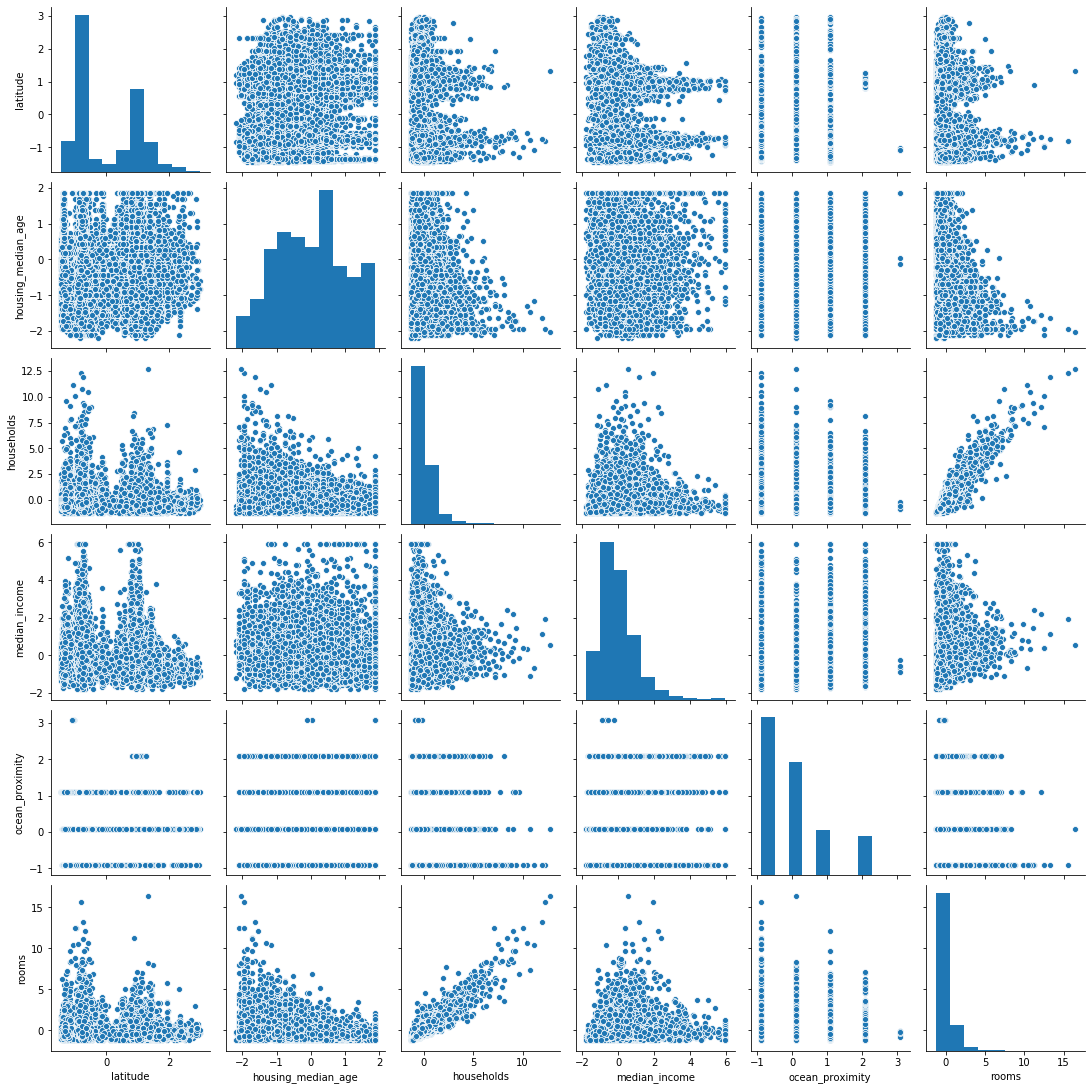

In [573]:
sns.pairplot(x_train)

In [495]:
x_test=pd.DataFrame(x_test1, columns=colnamestest)
x_test # standardized x_test

,latitude,housing_median_age,households,median_income,ocean_proximity,rooms
0,-1.435785,-1.158447,-0.361000,-0.599309,1.087199,-0.502032
1,-0.803748,-0.840502,0.372955,-0.136246,-0.903026,0.117695
2,1.195360,-0.204612,-0.817101,-0.922898,0.092086,2.005906
3,1.312404,-0.443071,0.118692,-0.640877,-0.903026,0.096792
4,-1.351513,0.192819,-0.153920,-0.693458,1.087199,-0.249264
...,...,...,...,...,...,...
4123,-0.883338,-0.443071,-0.746326,-0.647972,-0.903026,-0.799315
4124,1.008090,1.862029,-0.258771,-0.066720,2.082311,-0.273263
4125,-0.761612,0.351791,1.109531,-0.523271,-0.903026,0.425429
4126,-0.799066,1.226139,-1.034666,-0.452580,-0.903026,-0.985117


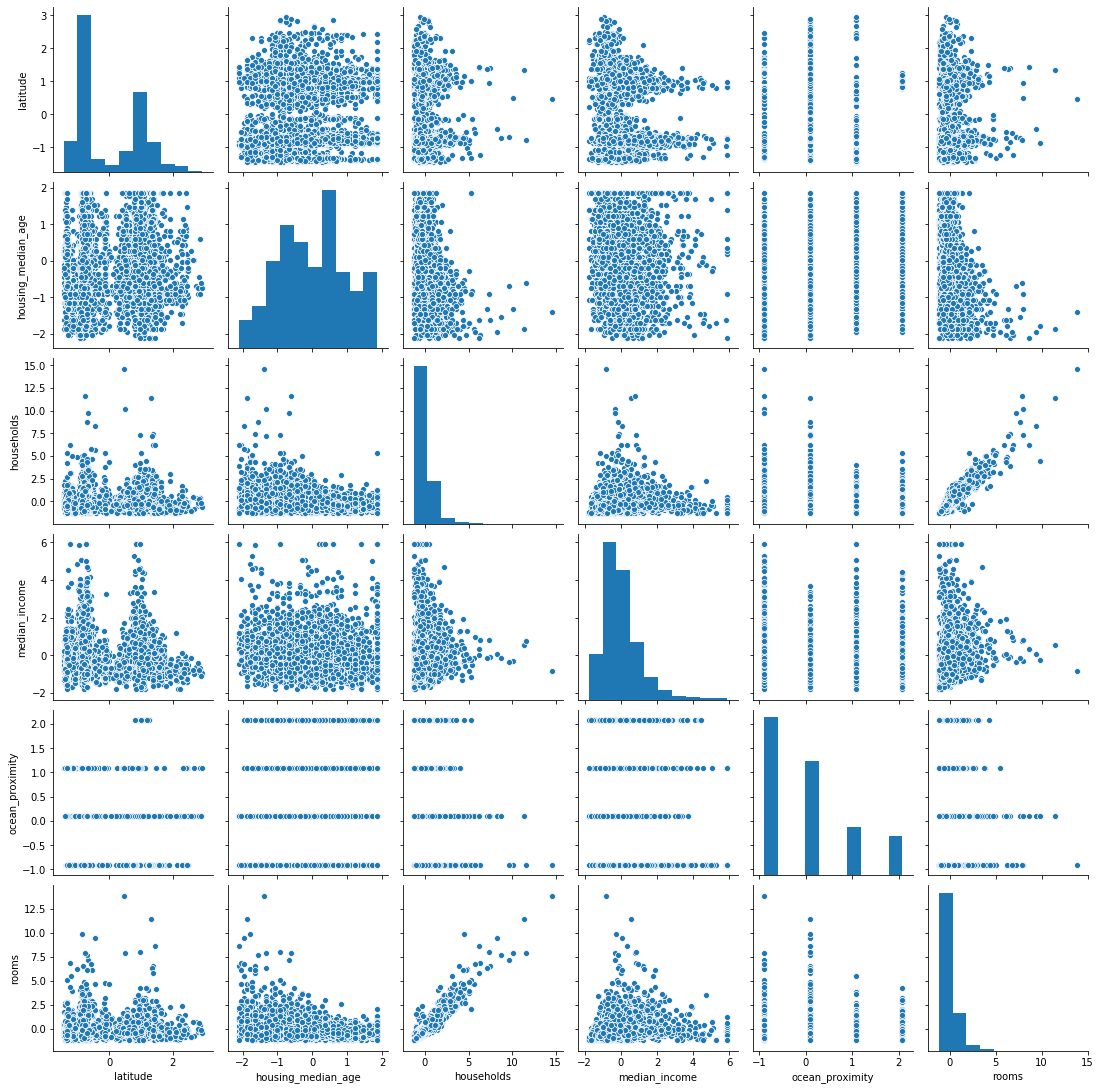

In [574]:
sns.pairplot(x_test)

In [496]:
# Running model in Training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
Modelsh= lm.fit(x_train,y_train) 

In [497]:
Modelsh.intercept_ 
#.intercept_ holds the bias 𝑏₀
# the intercept is 132103, and this is the value of the predicted response when 𝑥₁ = 𝑥₂ = x3 = x4 = x5 = x6 = 0.

array([206389.63529554])

In [498]:
Modelsh.coef_
# .coef_ is an array containing 𝑏₁,𝑏₂,b3,b4,b5 and b6 respectively.
# The increase of 𝑥₁(latitude) by 1 yields the drop of the predicted response(median_house_value) by 5.21717762e+03.
# Similarly, when 𝑥₂(housing_median_age) grows by 1, the response rises by 1.76408728e+03.
# Similarly, when 𝑥3(households) grows by 1, the response rises by 1.30411863e+02.
# Similarly, when 𝑥4(median_income) grows by 1, the response rises by  4.60289057e+04.
# Similarly, when 𝑥5(ocean_proximity) grows by 1, the response rises by  7.84434282e+03.
# Similarly, when 𝑥6(rooms) grows by 1, the response drops by  1.52456074e+01

array([[-11143.6433401 ,  22193.62532398,  49751.44908396,
         86926.00358911,   7882.87151187, -39385.45545959]])

In [499]:
# Making predictions 
pred_sh = Modelsh.predict(x_test)
pred_sh
# y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1) You can predict the output values by multiplying 
# each column of the input with the appropriate weight, summing the results and adding the intercept to the sum.

array([[154966.52171535],
       [191650.3777525 ],
       [-10625.53057497],
       ...,
       [208525.08951129],
       [183370.3717609 ],
       [146181.39710398]])

Text(0, 0.5, 'Predictions')

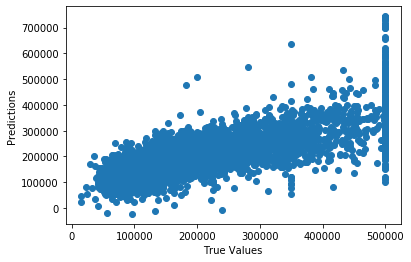

In [507]:
# Let's plot the model
## The line / model
plt.scatter(y_test, pred_sh)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [500]:
from sklearn.metrics import r2_score
r2_score(y_test,pred_sh) # r_score(actual,predicted)
# or
# print ('Score:', Modelsh.score(x_test, y_test))

0.5507904739121359

In [501]:
Predicted_sh = pd.DataFrame(pred_sh,columns=["Predicted_median_house_value"])
Predicted_sh

,Predicted_median_house_value
0,154966.521715
1,191650.377753
2,-10625.530575
3,121196.936224
4,176180.129645
...,...
4123,137306.378106
4124,244984.295991
4125,208525.089511
4126,183370.371761


In [502]:
Predicted_sh = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),Predicted_sh],axis=1)
Predicted_sh

,latitude,housing_median_age,households,median_income,ocean_proximity,rooms,median_house_value,Predicted_median_house_value
0,-1.435785,-1.158447,-0.361000,-0.599309,1.087199,-0.502032,93600,154966.521715
1,-0.803748,-0.840502,0.372955,-0.136246,-0.903026,0.117695,153600,191650.377753
2,1.195360,-0.204612,-0.817101,-0.922898,0.092086,2.005906,132500,-10625.530575
3,1.312404,-0.443071,0.118692,-0.640877,-0.903026,0.096792,147900,121196.936224
4,-1.351513,0.192819,-0.153920,-0.693458,1.087199,-0.249264,120700,176180.129645
...,...,...,...,...,...,...,...,...
4123,-0.883338,-0.443071,-0.746326,-0.647972,-0.903026,-0.799315,156300,137306.378106
4124,1.008090,1.862029,-0.258771,-0.066720,2.082311,-0.273263,500001,244984.295991
4125,-0.761612,0.351791,1.109531,-0.523271,-0.903026,0.425429,285300,208525.089511
4126,-0.799066,1.226139,-1.034666,-0.452580,-0.903026,-0.985117,202500,183370.371761


In [503]:
#Checking accuracy
Predicted_sh1= Predicted_sh
Predicted_sh1["Deviation"] = abs(Predicted_sh1['median_house_value']-Predicted_sh1['Predicted_median_house_value'])/Predicted_sh1['median_house_value']
Predicted_sh1 # .65,.25,1.05,.17,.45

,latitude,housing_median_age,households,median_income,ocean_proximity,rooms,median_house_value,Predicted_median_house_value,Deviation
0,-1.435785,-1.158447,-0.361000,-0.599309,1.087199,-0.502032,93600,154966.521715,0.655625
1,-0.803748,-0.840502,0.372955,-0.136246,-0.903026,0.117695,153600,191650.377753,0.247724
2,1.195360,-0.204612,-0.817101,-0.922898,0.092086,2.005906,132500,-10625.530575,1.080193
3,1.312404,-0.443071,0.118692,-0.640877,-0.903026,0.096792,147900,121196.936224,0.180548
4,-1.351513,0.192819,-0.153920,-0.693458,1.087199,-0.249264,120700,176180.129645,0.459653
...,...,...,...,...,...,...,...,...,...
4123,-0.883338,-0.443071,-0.746326,-0.647972,-0.903026,-0.799315,156300,137306.378106,0.121520
4124,1.008090,1.862029,-0.258771,-0.066720,2.082311,-0.273263,500001,244984.295991,0.510032
4125,-0.761612,0.351791,1.109531,-0.523271,-0.903026,0.425429,285300,208525.089511,0.269102
4126,-0.799066,1.226139,-1.034666,-0.452580,-0.903026,-0.985117,202500,183370.371761,0.094467


In [504]:
Accuracy = 1-Predicted_sh1.Deviation.mean()
Accuracy 
# MAPE(Mean Absolute Percentage Error)

0.6485173281920534

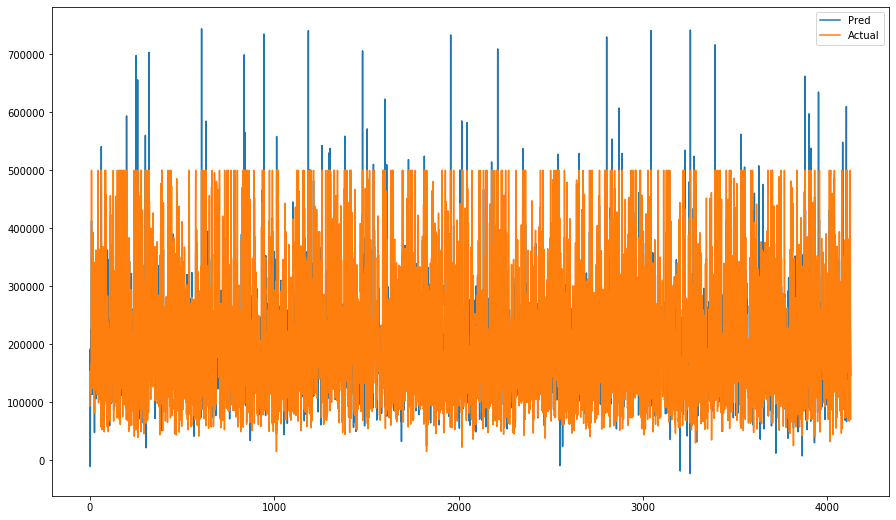

In [505]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (15,9))
plt.plot(Predicted_sh1.Predicted_median_house_value,label="Pred")
plt.plot(Predicted_sh1.median_house_value,label="Actual")
plt.legend()

Cross-validated scores: [0.38353874 0.38675322 0.52761427 0.47091458 0.39748703 0.57372976]
Cross-Predicted Accuracy: 0.4985159728827041


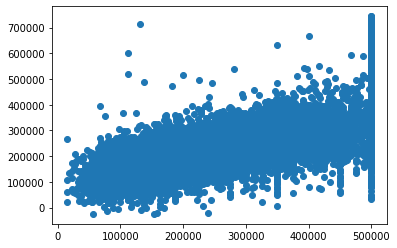

In [518]:


    
# We want sensitivity accuracy score to be high. SO will use KNN to be accurate on our predictions.
# KNN algorithm
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=3)
#classifier.fit(x,y)    
#from sklearn.model_selection import cross_val_score
#Accuracy_Scores_10_fold = cross_val_score(classifier,x,y,cv=10,scoring='accuracy')
#Accuracy_Scores_10_fold

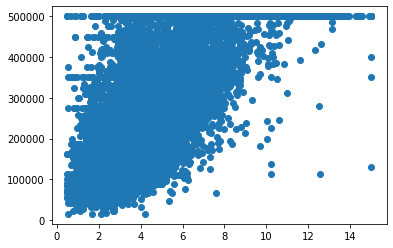

In [526]:
plt.scatter(x['median_income'], y['median_house_value'])

In [ ]:
# Y variable median_house_value is right skewed so taking log of it and after creation of model,coverting to exponential for
# interpretation.
import numpy as np
transformed_price = np.log(ca_house.median_house_value)
transformed_price = pd.DataFrame(transformed_price)
transformed_price.columns = ['Log_transformed']
transformed_price
ca_house1 = pd.concat([ca_house,transformed_price],axis=1)
ca_house1
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(pd.DataFrame(ca_house1.median_income),ca_house1.Log_transformed)
lm_model
lm_model.intercept_
lm_model.coef_
predicted_log = lm_model.predict(pd.DataFrame(ca_house1.median_income))
predicted_log
np.exp(predicted_log)
pd.concat([ca_house1,pd.DataFrame(np.exp(predicted_log))],axis=1)


In [ ]:
from scipy.stats import norm
norm.cdf(4,np.mean(ca_house1.median_income),np.std(ca_house1.median_income))
# 52% people have income higher than 4000$